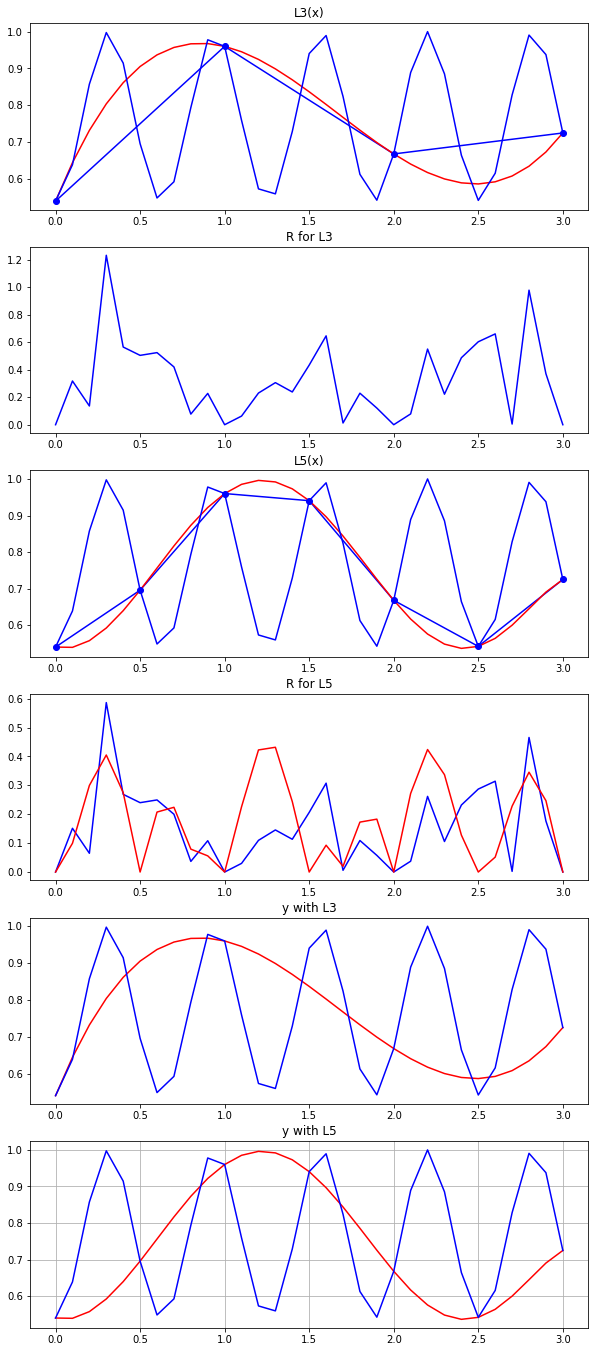

In [59]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

def Lag(x, y, Xsample):
  F = 0
  for i in range(len(y)):
    p1 = 1
    p2 = 1
    for k in range(len(x)):
      if (k != i):
        p1 = p1 * (Xsample - x[k])
        p2 = p2 * (x[i] - x[k])
    F = F + y[i] * p1 / p2
  return F

def F(x):
  return math.cos(math.cos(5 * x))
  # return x * math.exp(x) + math.sin(x)

def Rprac(y, yInters):
  arr = []
  for i in range(len(y)):
    arr.append(abs(y[i] - yInters[i]))
  arr = np.array(arr)
  return arr

def diff4(i):
    x = sp.symbols('x')
    func = sp.cos(sp.cos(5 * x))
    yprime = sp.diff(func, x, 4)
    yprime = yprime.subs({x: i})
    return yprime.evalf()

def Rteor(X, xSamples):
  arr = []
  factr = math.factorial(len(xSamples))
  for x in X:
    arr.append(abs(diff4(x) / factr * (x - X[0]) * (x - X[10]) * (x - X[20]) * (x - X[30])))
  arr = np.array(arr)
  return arr

X = np.array(np.arange(0, 3.1, 0.1), dtype=float)
Y = np.array([F(x) for x in X])

x1 = np.array(np.arange(0, 1.1, 0.1), dtype=float)
y1 = np.array([F(x) for x in x1])

x2 = np.array(np.arange(1, 2.1, 0.1), dtype=float)
y2 = np.array([F(x) for x in x2])

x3 = np.array(np.arange(2, 3.1, 0.1), dtype=float)
y3 = np.array([F(x) for x in x3])

x4 = np.array(np.arange(0, 3.1, 1), dtype=float)
L3 = np.array([F(x) for x in x4])

x4 = np.array(np.arange(0, 3.1, 1), dtype=float)
L3 = np.array([F(x) for x in x4])

x5 = np.array(np.arange(0, 3.1, 0.5), dtype=float)
L5 = np.array([F(x) for x in x5])

fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize = (10, 24))

ax1, ax2, ax3, ax4, ax5, ax6 = axes

nodes = 31
titles = ['L3(x)', 'R for L3', 'L5(x)', 'R for L5', 'y with L3', 'y with L5']

for i in range(len(axes)):
  axes[i].set_title(titles[i])

rteorY_L3 = []
rteorY_L5 = []

rpracY_L3 = []
rpracY_L5 = []

xSamples = []
yInters = []

for x, y in [[x4, L3]]:
  xSamples = np.linspace(np.min(x), np.max(x), nodes)
  yInters = [Lag(x, y, i) for i in xSamples]
  ax1.plot(x, y, color='b')
  ax1.plot(xSamples, yInters, color='r')
  ax5.plot(xSamples, yInters, color='r')
  ax1.plot(x, y, marker='o', color='b', ls='')
  
rpracY_L3 = Rprac(Y, yInters)
rteorY_L3 = Rteor(X, x4)

xSamples = []
yInters = []

for x, y in [[x5, L5]]:
  xSamples = np.linspace(np.min(x), np.max(x), nodes)
  yInters = [Lag(x, y, i) for i in xSamples]
  ax3.plot(x, y, color='b')
  ax3.plot(xSamples, yInters, color='r')
  ax6.plot(xSamples, yInters, color='r')
  ax3.plot(x, y, marker='o', color='b', ls='')
  
rpracY_L5 = Rprac(Y, yInters)
rteorY_L5 = Rteor(X, x5)

for x, y, color, ax in [[X, rteorY_L3 / 100, 'b', ax2], [X, rteorY_L5, 'b', ax4], [X, rpracY_L5, 'r', ax4]]:
  ax.plot(x, y, color=color)

for x, y in [[X, Y]]:
  ax1.plot(x, y, color='b')
  ax3.plot(x, y, color='b')
  ax5.plot(x, y, color='b')
  ax6.plot(x, y, color='b')


plt.grid(True)
plt.show()

In [ ]:
0
0.0055074026
0.125475484
0.1934629583
0.0531976002
0.2095108053
0.3882233352
0.3644387432
0.1730786939
0.010281889
0
0.1861465696
0.3512765316
0.3390905164
0.1402721929
0.1037483639
0.1869977455
0.0568529302
0.1197078292
0.1564639868
0
0.2483950775
0.3822920095
0.2851109809
0.0749111908
0.044576403
0.0231864305
0.2199266762
0.3557959528
0.2642279756
0